In [140]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.preprocessing import OneHotEncoder
import warnings

In [141]:
df = pd.read_csv(r"C:\Users\Mr Ochuko\Desktop\nexus bank2.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [142]:
# We use it to know about the data type of columns and check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [143]:
# To show that blue-collar have the largest number in that column????
df.job.value_counts(dropna=False)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<AxesSubplot:>

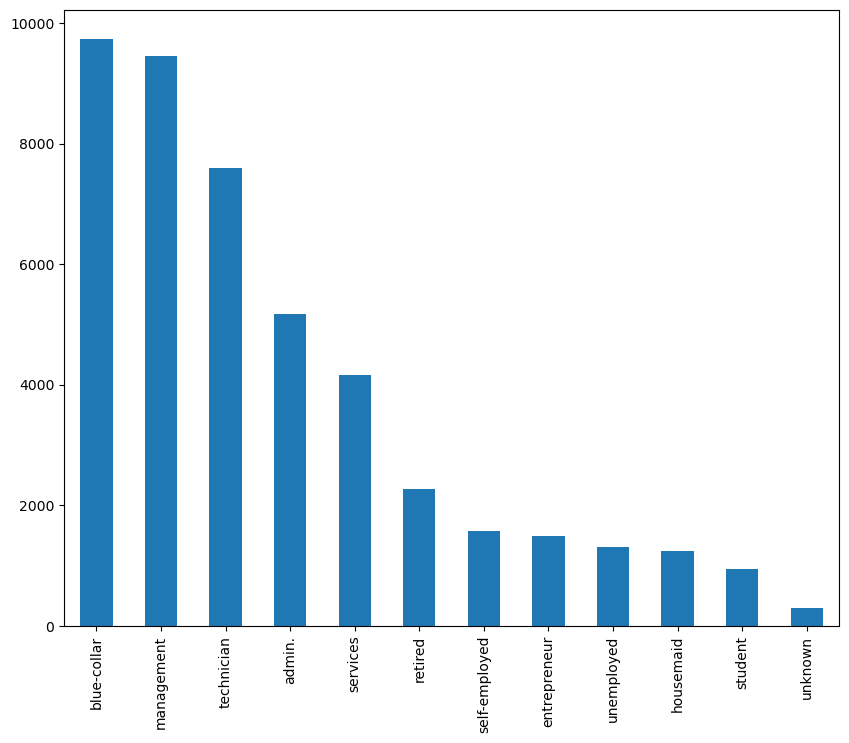

In [144]:
plt.figure(figsize=(10,8))
df.job.value_counts().plot.bar()

TypeError: len() takes exactly one argument (0 given)

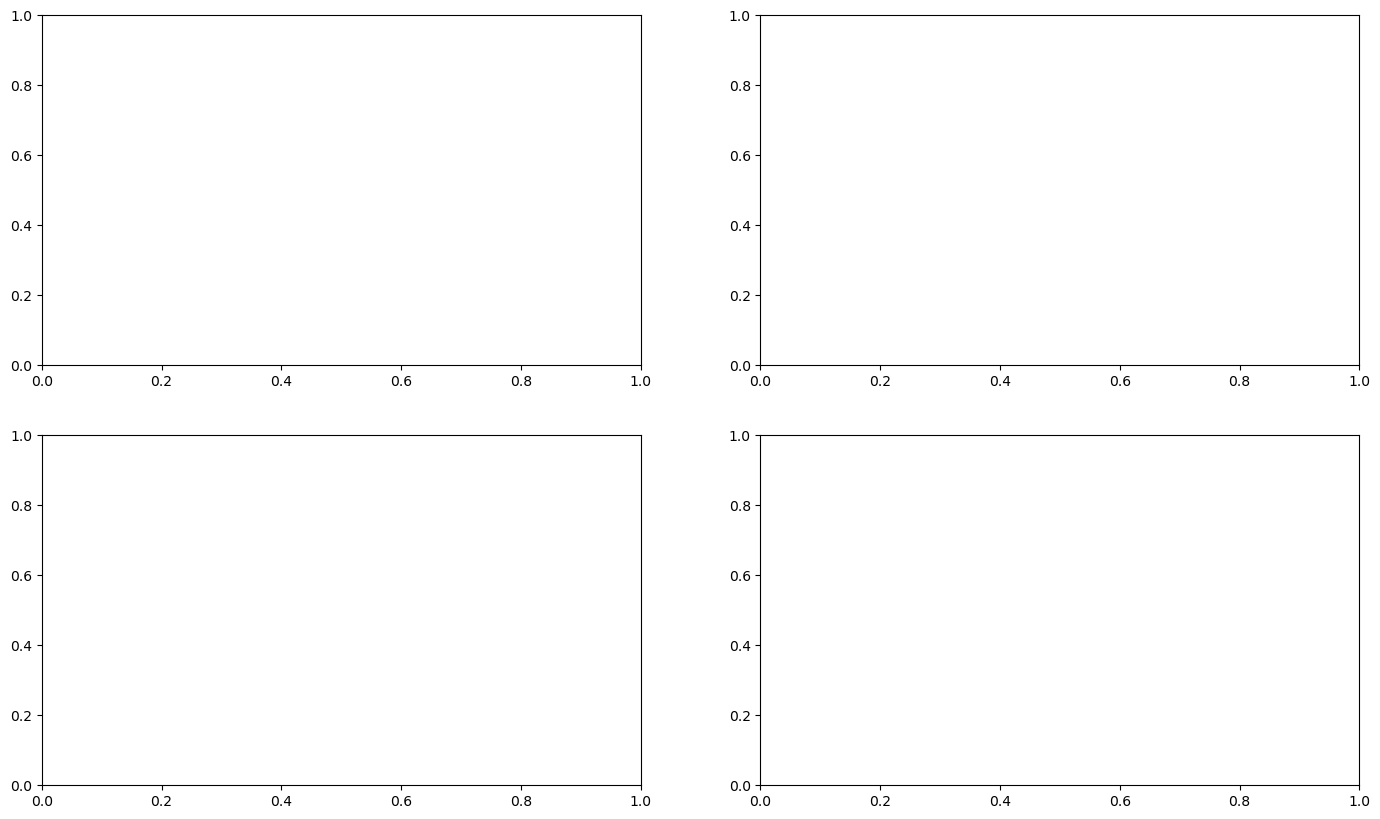

In [145]:
fig,axes=plt.subplots(2,2,figsize=(17,10))

colors=['b','g','r','c']
for i,ax in zip(range(len()),axes.ravel()):
    df[cols[i]].value_counts().head(10).plot.barh(ax=ax,title=cols[i],color=colors[i])

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Numbers of defaulter that have previously defaulted in credit card payment 'no':1,'yes':0
df['default'].value_counts()

In [146]:
# Numbers of loan that have previous loan feature 'no':1,'yes':0
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [147]:
# Numbers of housing loan from the bank before now that. 'no':1,'yes':0
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [148]:
# Numbers of deposit to the bank before now. 'no':1,'yes':0
df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [149]:
# A total 17544 customer where contacted just ones???
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [150]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [151]:
# Number of row and columns in the data set of 45211 Rows and 17 columns?????
df.shape

(45211, 17)

In [152]:
# Knowning if my table have header????
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [153]:
# Checking for missing feature in the data set????
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Text(0.5, 1.0, 'Total Number of Customers')

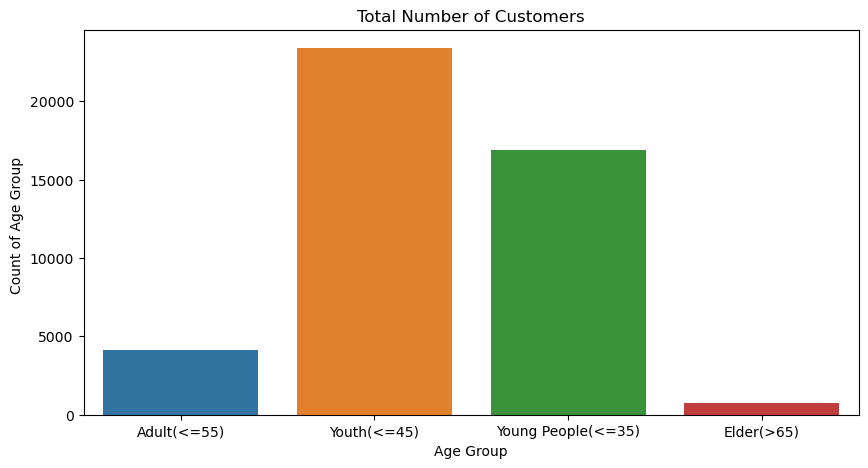

In [154]:
# Creat a new feature from the existing one???
def age_bracket(age):
    if age <=35:
        return 'Young People(<=35)'
    elif age <= 55:
        return 'Youth(<=45)'
    elif age <= 65:
        return 'Adult(<=55)'
    else:
        return 'Elder(>65)'
    
df['age_bracket'] = df['age'].apply(age_bracket) 

plt.figure(figsize = (10,5))
sns.countplot(x='age_bracket',data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group ')
plt.title('Total Number of Customers')

<AxesSubplot:title={'center':'count of default'}>

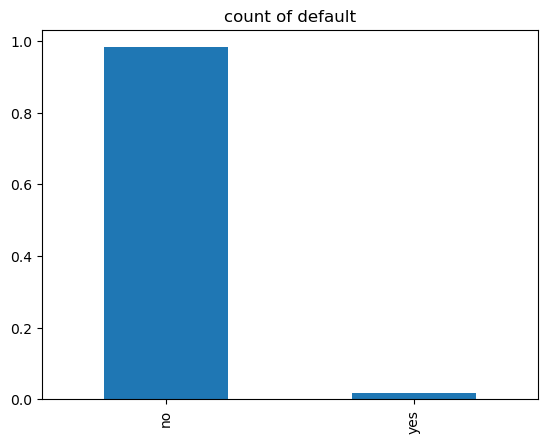

In [155]:
# showing that about 95% of persons did not default on the loan??? 
df.default.value_counts(normalize=True).plot(kind = 'bar', title = 'count of default')

<AxesSubplot:xlabel='campaign', ylabel='Count'>

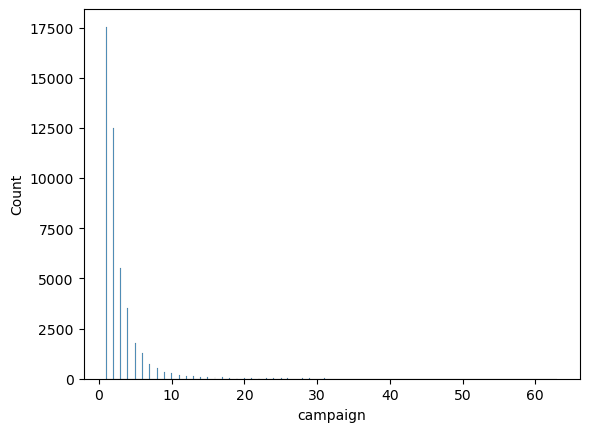

In [156]:
sns.histplot(df['campaign'])

In [157]:
X=df[['default','loan']]
y=df['campaign']

In [158]:
ohe=OneHotEncoder()
ohe.fit(X[['default','loan']])

OneHotEncoder()

In [159]:
column_trans=make_column_transformer((OneHotEncoder(categoried=ohe.categories_),['default','loan',OneHotEncoder(), [0])],remainder ='passthrough')
X=ct.fit_transform(X)                                     

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3210975212.py, line 1)

In [160]:
df=pd.get_dummies(df,prefix=['status'],columns=['marital'])
df

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket,status_divorced,status_married,status_single
0,58,management,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Adult(<=55),0,1,0
1,44,technician,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Youth(<=45),0,0,1
2,33,entrepreneur,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Young People(<=35),0,1,0
3,47,blue-collar,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Youth(<=45),0,1,0
4,33,unknown,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Young People(<=35),0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Youth(<=45),0,1,0
45207,71,retired,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Elder(>65),1,0,0
45208,72,retired,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Elder(>65),0,1,0
45209,57,blue-collar,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Adult(<=55),0,1,0


In [162]:
df['loan'].replace({'no':0,'yes':1},inplace= True)
df

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket,status_divorced,status_married,status_single
0,58,management,tertiary,no,2143,yes,0,unknown,5,may,261,1,-1,0,unknown,no,Adult(<=55),0,1,0
1,44,technician,secondary,no,29,yes,0,unknown,5,may,151,1,-1,0,unknown,no,Youth(<=45),0,0,1
2,33,entrepreneur,secondary,no,2,yes,1,unknown,5,may,76,1,-1,0,unknown,no,Young People(<=35),0,1,0
3,47,blue-collar,unknown,no,1506,yes,0,unknown,5,may,92,1,-1,0,unknown,no,Youth(<=45),0,1,0
4,33,unknown,unknown,no,1,no,0,unknown,5,may,198,1,-1,0,unknown,no,Young People(<=35),0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,no,825,no,0,cellular,17,nov,977,3,-1,0,unknown,yes,Youth(<=45),0,1,0
45207,71,retired,primary,no,1729,no,0,cellular,17,nov,456,2,-1,0,unknown,yes,Elder(>65),1,0,0
45208,72,retired,secondary,no,5715,no,0,cellular,17,nov,1127,5,184,3,success,yes,Elder(>65),0,1,0
45209,57,blue-collar,secondary,no,668,no,0,telephone,17,nov,508,4,-1,0,unknown,no,Adult(<=55),0,1,0


In [163]:
df['default'].replace({'yes':1,'no':0},inplace= True)
df

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket,status_divorced,status_married,status_single
0,58,management,tertiary,0,2143,yes,0,unknown,5,may,261,1,-1,0,unknown,no,Adult(<=55),0,1,0
1,44,technician,secondary,0,29,yes,0,unknown,5,may,151,1,-1,0,unknown,no,Youth(<=45),0,0,1
2,33,entrepreneur,secondary,0,2,yes,1,unknown,5,may,76,1,-1,0,unknown,no,Young People(<=35),0,1,0
3,47,blue-collar,unknown,0,1506,yes,0,unknown,5,may,92,1,-1,0,unknown,no,Youth(<=45),0,1,0
4,33,unknown,unknown,0,1,no,0,unknown,5,may,198,1,-1,0,unknown,no,Young People(<=35),0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,0,825,no,0,cellular,17,nov,977,3,-1,0,unknown,yes,Youth(<=45),0,1,0
45207,71,retired,primary,0,1729,no,0,cellular,17,nov,456,2,-1,0,unknown,yes,Elder(>65),1,0,0
45208,72,retired,secondary,0,5715,no,0,cellular,17,nov,1127,5,184,3,success,yes,Elder(>65),0,1,0
45209,57,blue-collar,secondary,0,668,no,0,telephone,17,nov,508,4,-1,0,unknown,no,Adult(<=55),0,1,0


In [164]:
df['deposit'].replace({'no':0,'yes':1,},inplace= True)
df

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket,status_divorced,status_married,status_single
0,58,management,tertiary,0,2143,yes,0,unknown,5,may,261,1,-1,0,unknown,0,Adult(<=55),0,1,0
1,44,technician,secondary,0,29,yes,0,unknown,5,may,151,1,-1,0,unknown,0,Youth(<=45),0,0,1
2,33,entrepreneur,secondary,0,2,yes,1,unknown,5,may,76,1,-1,0,unknown,0,Young People(<=35),0,1,0
3,47,blue-collar,unknown,0,1506,yes,0,unknown,5,may,92,1,-1,0,unknown,0,Youth(<=45),0,1,0
4,33,unknown,unknown,0,1,no,0,unknown,5,may,198,1,-1,0,unknown,0,Young People(<=35),0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,0,825,no,0,cellular,17,nov,977,3,-1,0,unknown,1,Youth(<=45),0,1,0
45207,71,retired,primary,0,1729,no,0,cellular,17,nov,456,2,-1,0,unknown,1,Elder(>65),1,0,0
45208,72,retired,secondary,0,5715,no,0,cellular,17,nov,1127,5,184,3,success,1,Elder(>65),0,1,0
45209,57,blue-collar,secondary,0,668,no,0,telephone,17,nov,508,4,-1,0,unknown,0,Adult(<=55),0,1,0


In [168]:
X=df[['default','loan']]
y=df['deposit']

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

In [170]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=35)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('recall: %.2f' % recall)
print('f1: %.2f' % f1)

Accuracy: 0.88
Precision: 0.00
recall: 0.00
f1: 0.00


C:\Users\Mr Ochuko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
# No it dont deposited=0 ,yes it deposited=1

In [172]:
#0 is negative(no) and 1 is positive(yes)

In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[7969    0]
 [1074    0]]
